In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime 
from datetime import date
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import folium
from folium import plugins
from IPython.display import HTML, display

from folium.plugins import TimestampedGeoJson

from scipy import stats




In [3]:
df = pd.read_csv('kc_house_data.csv') #Importing housing data
print(df.shape) 
df.head() 


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# df_unique.info()
df['waterfront'].isnull().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [5]:
# sqft_basement    21420 non-null object
df[df['sqft_basement']

SyntaxError: unexpected EOF while parsing (<ipython-input-5-9d8391a2d95c>, line 2)

In [6]:
# date             21420 non-null datetime64[ns]
# sqft_basement    21420 non-null object

df['date']= pd.to_datetime(df['date']) 

df['rel_date'] = df['date'] - df['date'].min()
df['rel_date'] = pd.to_numeric(df['rel_date'].dt.days, downcast='integer')


df_unique = df.drop_duplicates(subset = 'id', keep = 'last')

df_unique['sqft_basement'].replace('?', 0.0,inplace =True)
df_unique['yr_renovated'].fillna(0.0, inplace=True)
df_unique['waterfront'].fillna(0.0, inplace=True)
df_unique['view'].fillna(0.0, inplace=True)

df_unique['rel_date'] = df_unique['date'] - df_unique['date'].min()
df_unique['rel_date'] = pd.to_numeric(df_unique['rel_date'].dt.days, downcast='integer')


plot_df = df_unique.drop(['price','date','id'], axis= 1)

plot_df = plot_df.apply(pd.to_numeric)
df_unique = df_unique.apply(pd.to_numeric)
df_unique['date']= pd.to_datetime(df['date']) 


df_unique

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,164
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,221
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,299
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,221
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,19
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,297
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,52
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,259


In [7]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
rel_date         21420 non-null int16
dtypes: datetime64[ns](1), f

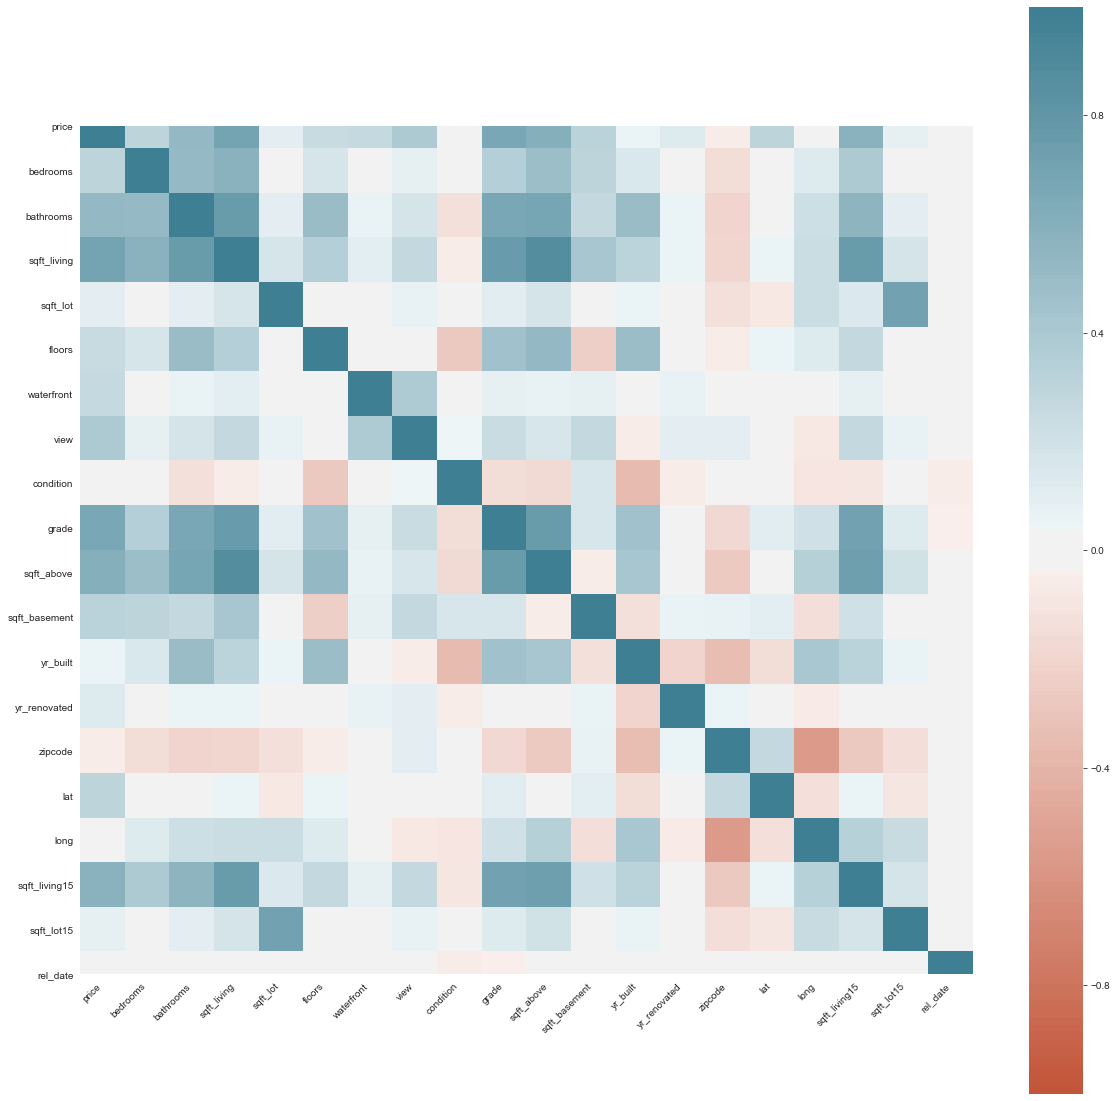

In [8]:
corr =df_unique.drop(['id','date'],axis=1).corr()

ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
m = folium.Map([df_unique['lat'][0], df_unique['long'][0]], zoom_start=9)

locations = df_unique[['lat', 'long']].values
m.add_child(plugins.HeatMap(locations, radius=15))

In [10]:
df.loc[df['id']==6021500970]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date
19320,6021500970,2014-05-28,345000.0,2,1.0,1080,4000,1.0,0.0,0.0,...,1080,0.0,1940,0.0,98117,47.6902,-122.387,1530,4240,26
19321,6021500970,2015-04-07,874950.0,2,1.0,1080,4000,1.0,0.0,0.0,...,1080,?,1940,NaN,98117,47.6902,-122.387,1530,4240,340


In [62]:
def duplicates(df):
    
    data_len = len(df)
    unique_len = len(df['id'].unique())
    duplicate_dict = dict()
    
    if data_len == unique_len:
        print("No duplicate ids found in data")
    
    else:
        print("Duplicate ids found!!  Total number of duplicate entries : {}".format(data_len - unique_len))
        duplicate_ids = np.array(list(df.loc[df['id'].duplicated()]['id']))
        
        for ids in duplicate_ids:
            duplicate_dict.update({ids : len(df.loc[df['id'] == ids])})
            duplicate_dict
        
        duplicate_df = pd.DataFrame.from_dict(data = duplicate_dict, orient = 'index',columns=['repeated'])
        duplicate_df.sort_values(by = ['repeated'], inplace=True, ascending=False)
        duplicate_df.reset_index(inplace=True)
        duplicate_df.columns = ['id', 'repeated']
        duplicate_df
        
        lat = pd.Series([])
        long = pd.Series([])
        
        lat = []
        long = []
        price =[]
        for ids in duplicate_df['id']:
            
            lat.insert(-1,list(df.loc[df['id'] == ids]['lat']).pop())
            long.insert(-1,list(df.loc[df['id'] == ids]['long']).pop())
            
       
        duplicate_df['lat'] = lat
        duplicate_df['long'] = long

        return duplicate_df, duplicate_dict
    
duplicate_df, duplicate_dict =duplicates(df)
duplicate_df


Duplicate ids found!!  Total number of duplicate entries : 177


,id,repeated,lat,long
0,795000620,3,47.6870,-122.386
1,6021501535,2,47.7114,-122.284
2,3935900232,2,47.4550,-122.350
3,1217000340,2,47.7735,-122.133
4,9238500040,2,47.7112,-122.357
...,...,...,...,...
171,2621600015,2,47.5660,-122.140
172,2206700215,2,47.4046,-122.181
173,2787460720,2,47.4987,-122.341
174,3883800011,2,47.5184,-121.886


In [12]:
list([duplicate_df['id']==6021500970])

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 171    False
 172    False
 173    False
 174    False
 175    False
 Name: id, Length: 176, dtype: bool]

In [18]:
list(duplicate_df.loc[duplicate_df['id'] == 6021500970]['repeated']).pop()

2

In [50]:
repeated = []


search_in = duplicate_df['repeated']

for ids in df_unique['id']:
    if duplicate_df['id'].isin([ids]).sum() != 0:
        
        repeated.insert(-1,list(duplicate_df.loc[duplicate_df['id'] == ids]['repeated']).pop())
#         repeated = repeated.append(repeated1, ignore_index=True)
    
    
    else:
        repeated.insert(-1,1)
        


0        1
1        1
2        1
3        1
4        1
        ..
21592    1
21593    1
21594    1
21595    1
21596    1
Name: repeated, Length: 21420, dtype: int64

In [58]:
df_unique['repeated'] = repeated
 
df_unique.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date,repeated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,164,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,221,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,299,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,221,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,292,1


Duplicate ids found!!  Total number of duplicate entries : 177
Plotting price change and location data:
6021500970


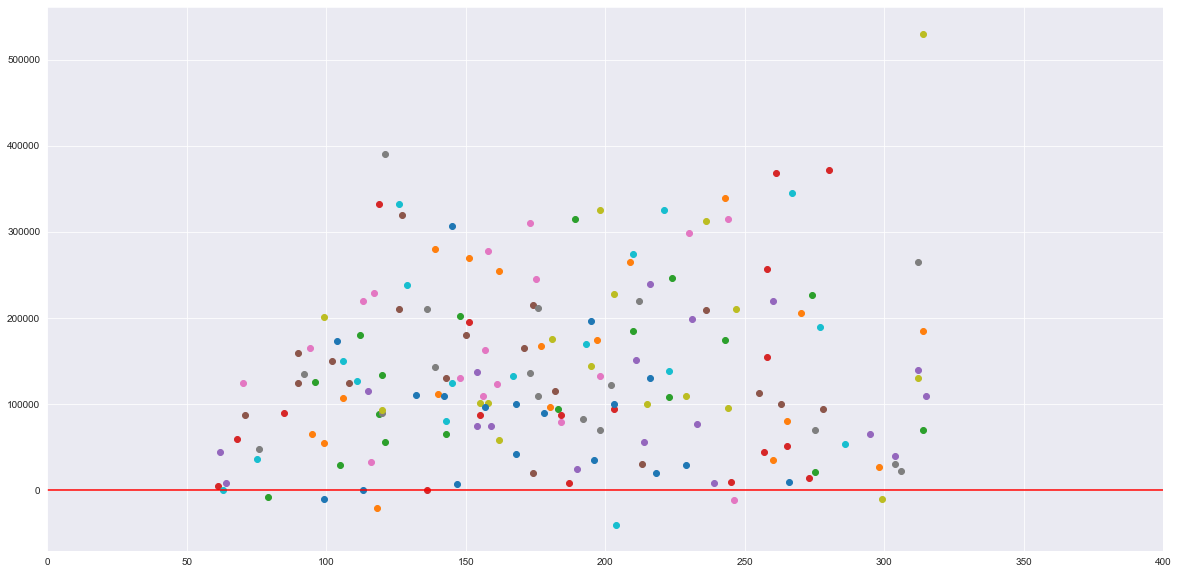

In [325]:
plt.figure(figsize=(20,10))
for ids in duplicate_df['id']:
            
    y = list(df.loc[df['id'] == ids]['price'])
    price_change = y[-1]-y[0]
    x = list(df.loc[df['id'] == ids]['rel_date'])
    period_time = x[-1] - x[0]
    if price_change > 500000:
        print(ids)
#     plt.plot(x,y)
    plt.scatter(period_time,price_change)
    
    
    
plt.plot([0,400],[0,0], color ='red')
plt.xlim(0,400)
plt.xlabel = 'Days since first day entry'
plt.ylabel = 'Price in USD'
plt.title = 'Prices duplicates were sold at within the same year'
plt.show()

In [59]:

m = folium.Map([duplicate_df['lat'][0], duplicate_df['long'][0]], zoom_start=9)

locations = duplicate_df[['lat', 'long']].values
m.add_child(plugins.HeatMap(locations, radius=15))

display(m)


In [340]:
target = df_unique['price']

df = df_unique.drop(['id','date','price'],axis=1)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,164
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,221
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,299
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,221
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,19
21593,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,297
21594,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,52
21595,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,259


In [349]:
df, df_test, target, target_test = train_test_split(df, target, test_size=.2, random_state= 42)
list(df.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'rel_date']

In [60]:
#Standardise:
# Get Variables as they are for UNSTANDARDISED Coefs
df_small = df[["bedrooms","sqft_living"]]

# Take Two Variabls and Z score them! 
df_small['z_bedrooms'] = stats.zscore(df_small['bedrooms'])
df_small['z_sqft_living'] = stats.zscore(df_small['sqft_living'])

# Break them up into two sep dfs
df_unstandardised = df_small[['bedrooms',"sqft_living"]]
df_standardised = df_small[['z_bedrooms',"z_sqft_living"]]

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [61]:
df_unstandardised.head()

,bedrooms,sqft_living
0,3,1180
1,3,2570
2,2,770
3,4,1960
4,3,1680


In [354]:
df_standardised.head()

,z_bedrooms,z_sqft_living
6971,-0.428267,-0.349078
19168,-0.428267,-0.701539
9235,0.683564,1.509353
9478,0.683564,1.199614
4220,-0.428267,-0.108764


In [355]:
X_unstandardised = sm.add_constant(df_unstandardised)
model_unstandardised = sm.OLS(target,X_unstandardised)
results_unstandardised = model_unstandardised.fit()

results_unstandardised.summary()

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     5728.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:02:37   Log-Likelihood:            -1.5266e+05
No. Observations:               10966   AIC:                         3.053e+05
Df Residuals:                   10963   BIC:                         3.053e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.863e+04      1e+04      7.861      0.000     5.9e+04    9.82e+04
bedrooms    -6.339e+04   3547.442    -17.870      0.000   -7.03e+04   -5.64e+04
sqft_living   325.6273      3.408     95.554      0.000     318.947     332.307
==============================================================================
Omnibus:                     7503.588   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269518.392
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      26.628   Cond. No.                     9.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [356]:
results_unstandardised.params

const          78630.209574
bedrooms      -63394.524109
sqft_living      325.627295
dtype: float64

In [387]:
z_target = stats.zscore(target)


X_standardised = sm.add_constant(df_standardised)


X_standardised_all = sm.add_constant(df_standardised)
model_standardised_all = sm.OLS(z_target,X_standardised)
results_standardised_all = model_standardised_all.fit()
lm=results_standardised_all
results_standardised_all.summary()

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     5728.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:37:18   Log-Likelihood:                -11638.
No. Observations:               10966   AIC:                         2.328e+04
Df Residuals:                   10963   BIC:                         2.330e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.084e-16      0.007   1.62e-14      1.000      -0.013       0.013
z_bedrooms       -0.1483      0.008    -17.870      0.000      -0.165      -0.132
z_sqft_living     0.7928      0.008     95.554      0.000       0.776       0.809
==============================================================================
Omnibus:                     7503.588   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269518.392
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      26.628   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AttributeError: 'list' object has no attribute 'lower'

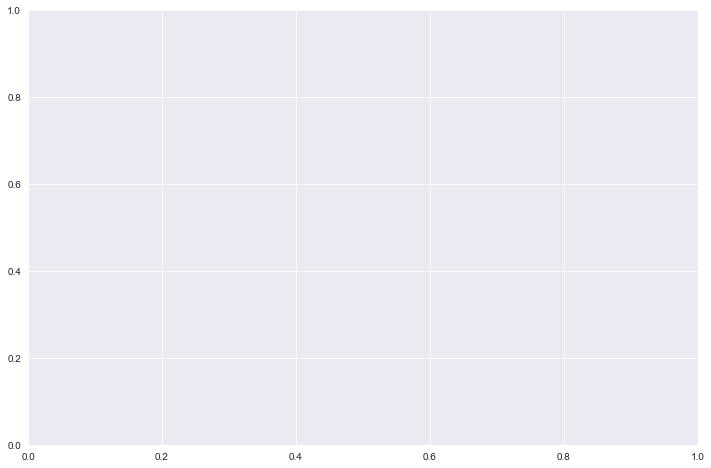

In [390]:
import lmdiag
%matplotlib inline 


fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_standardised_all, ax=ax, criterion= )

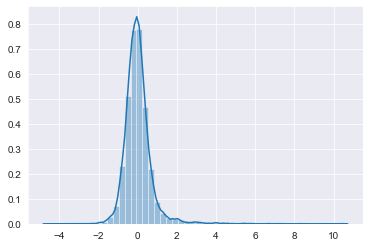

In [367]:
sns.distplot(results_standardised_all.resid)

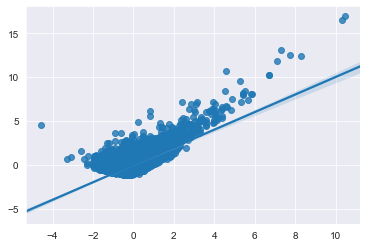

In [368]:
results_standardised_all.df_resid

# Poor Man's Diagnostic Plot 
sns.regplot(results_standardised_all.resid, z_target)

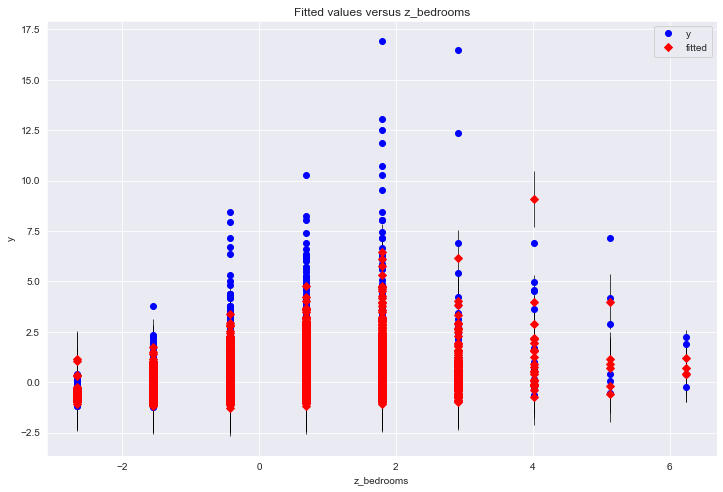

In [369]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results_standardised_all, "z_bedrooms", ax=ax)

In [359]:
X = df_unique.drop(['price', 'date','id'],axis=1)
y = df_unique['price']
    
model_skl = LinearRegression(fit_intercept=True)

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_b = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: {}'.format(est_b.round(4)))

R2 = 0.7
constant: 6409939.4236
coeficients: [-3.60178655e+04  4.24218525e+04  1.04521400e+02  1.23200000e-01
  7.20867350e+03  6.17659186e+05  5.28830522e+04  2.79787676e+04
  9.73482191e+04  7.61578000e+01  4.64647000e+01 -2.65034570e+03
  2.45274000e+01 -5.82310000e+02  6.04112723e+05 -2.16586603e+05
  2.12186000e+01 -3.86400000e-01  1.15069100e+02]


In [ ]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print('coeficients: {}'.format(est_b.round(4)))

In [264]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2641.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:00:54   Log-Likelihood:            -2.9195e+05
No. Observations:               21420   AIC:                         5.839e+05
Df Residuals:                   21400   BIC:                         5.841e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.41e+06   2.94e+06      2.179      0.029    6.45e+05    1.22e+07
bedrooms      -3.602e+04   1909.880    -18.859      0.000   -3.98e+04   -3.23e+04
bathrooms      4.242e+04   3274.333     12.956      0.000     3.6e+04    4.88e+04
sqft_living     104.5214     18.096      5.776      0.000      69.052     139.991
sqft_lot          0.1232      0.048      2.572      0.010       0.029       0.217
floors         7208.6735   3606.586      1.999      0.046     139.495    1.43e+04
waterfront     6.177e+05   1.81e+04     34.071      0.000    5.82e+05    6.53e+05
view           5.288e+04   2127.199     24.860      0.000    4.87e+04    5.71e+04
condition      2.798e+04   2364.127     11.835      0.000    2.33e+04    3.26e+04
grade          9.735e+04   2167.763     44.907      0.000    9.31e+04    1.02e+05
sqft_above       76.1578     18.086      4.211      0.000      40.707     111.608
sqft_basement    46.4647     17.924      2.592      0.010      11.332      81.597
yr_built      -2650.3457     72.148    -36.735      0.000   -2791.762   -2508.930
yr_renovated     24.5274      3.987      6.151      0.000      16.712      32.343
zipcode        -582.3100     33.120    -17.582      0.000    -647.228    -517.392
lat            6.041e+05   1.08e+04     56.099      0.000    5.83e+05    6.25e+05
long          -2.166e+05   1.32e+04    -16.413      0.000   -2.42e+05   -1.91e+05
sqft_living15    21.2186      3.457      6.138      0.000      14.442      27.995
sqft_lot15       -0.3864      0.073     -5.268      0.000      -0.530      -0.243
rel_date        115.0691     12.185      9.444      0.000      91.186     138.952
==============================================================================
Omnibus:                    18237.995   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1844482.714
Skew:                           3.574   Prob(JB):                         0.00
Kurtosis:                      47.895   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
output = 'price'
x_cols = list(plot_df.columns)
# x_cols.remove(output)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'rel_date']

In [266]:
train, test = train_test_split(df_unique)


In [267]:
print(len(train), len(test))
train.head()

16065 5355


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_date
13164,5323100120,2014-09-16,585000.0,3,3.50,1700,2197,2.0,0.0,0.0,...,1260,440.0,2010,0.0,98116,47.5767,-122.410,1360,1418,137
4057,8965500900,2015-02-13,725000.0,3,2.50,2090,9847,2.0,0.0,2.0,...,2090,0.0,1983,0.0,98006,47.5651,-122.114,2860,11483,287
9037,4136870110,2015-02-05,329800.0,4,2.50,2080,7047,2.0,0.0,0.0,...,2080,0.0,1996,0.0,98092,47.2627,-122.215,2580,7227,279
9261,7787050180,2015-01-28,585000.0,3,2.75,3080,7282,2.0,0.0,0.0,...,3080,0.0,2008,0.0,98059,47.4826,-122.149,3080,7274,271
20320,3814900380,2014-07-19,356250.0,3,2.50,2060,5115,2.0,0.0,0.0,...,2060,0.0,2014,0.0,98092,47.3261,-122.163,2648,4500,78


In [268]:
predictors = '+'.join(x_cols)
formula = output + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1993.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:00:58   Log-Likelihood:            -2.1899e+05
No. Observations:               16065   AIC:                         4.380e+05
Df Residuals:                   16045   BIC:                         4.382e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.429e+06   3.39e+06      2.191      0.028    7.82e+05    1.41e+07
bedrooms      -3.413e+04   2182.392    -15.640      0.000   -3.84e+04   -2.99e+04
bathrooms      4.066e+04   3814.009     10.660      0.000    3.32e+04    4.81e+04
sqft_living     100.6962     22.051      4.566      0.000      57.473     143.919
sqft_lot          0.1519      0.052      2.925      0.003       0.050       0.254
floors         5466.3996   4171.079      1.311      0.190   -2709.382    1.36e+04
waterfront     6.194e+05   2.09e+04     29.629      0.000    5.78e+05     6.6e+05
view           5.503e+04   2466.757     22.309      0.000    5.02e+04    5.99e+04
condition      2.826e+04   2747.063     10.287      0.000    2.29e+04    3.36e+04
grade           9.92e+04   2514.151     39.459      0.000    9.43e+04    1.04e+05
sqft_above       82.3898     22.018      3.742      0.000      39.232     125.547
sqft_basement    53.0300     21.836      2.429      0.015      10.229      95.831
yr_built      -2590.5024     83.410    -31.058      0.000   -2753.995   -2427.010
yr_renovated     26.6567      4.660      5.721      0.000      17.523      35.790
zipcode        -582.8709     38.270    -15.231      0.000    -657.884    -507.858
lat             6.11e+05   1.25e+04     49.060      0.000    5.87e+05    6.35e+05
long           -2.05e+05   1.53e+04    -13.406      0.000   -2.35e+05   -1.75e+05
sqft_living15    14.3943      3.996      3.602      0.000       6.562      22.227
sqft_lot15       -0.4742      0.086     -5.528      0.000      -0.642      -0.306
rel_date        106.8356     14.088      7.584      0.000      79.222     134.449
==============================================================================
Omnibus:                    13407.415   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253623.798
Skew:                           3.477   Prob(JB):                         0.00
Kurtosis:                      45.714   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

20 18
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.429e+06,3.39e+06,2.191,0.028,7.82e+05,1.41e+07
bedrooms,-3.413e+04,2182.392,-15.640,0.000,-3.84e+04,-2.99e+04
bathrooms,4.066e+04,3814.009,10.660,0.000,3.32e+04,4.81e+04
sqft_living,100.6962,22.051,4.566,0.000,57.473,143.919
sqft_lot,0.1519,0.052,2.925,0.003,0.050,0.254


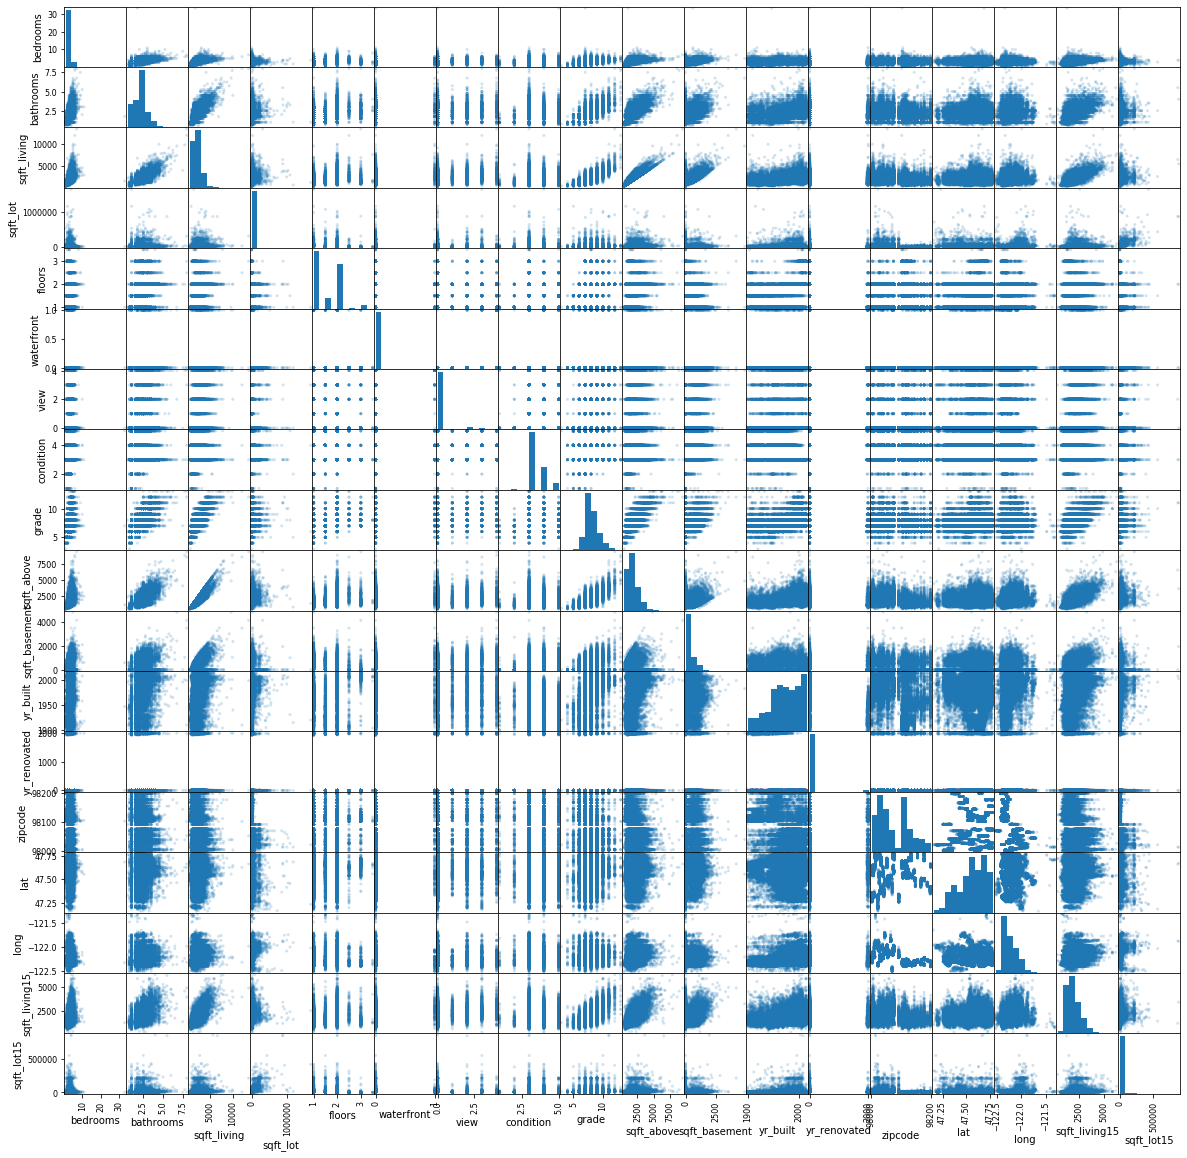

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_df = plot_df.apply(pd.to_numeric) # convert all columns of DataFrame

spm = pd.plotting.scatter_matrix(plot_df, alpha=0.2, figsize=(20, 20), diagonal='hist')


In [30]:
# fig, axes = plt.subplots(nrows= 3, ncols=6, figsize=(20,20))

# for xcol, ax in zip(list(plot_df.columns), axes):
#     df_unique.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
# # import seaborn as sns
# # sns.set(style="ticks")

# # sns.pairplot(df_unique)

# import seaborn as sns
# sns.set(style="ticks")

# mini_df = df_unique[:50]


# sns.pairplot(mini_df)

In [22]:
for column in plot_df.columns:
    df_unique[column] = df_unique[column].map(lambda x: float(x))

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_unique['id'].is_duplicated()

AttributeError: 'Series' object has no attribute 'is_duplicated'

In [61]:
X_house = df_unique.drop('price', axis=1)
y_house = df_unique['price']
df_unique['date']= pd.to_datetime(df['date']) 

X_house_model = df_unique[[
    'grade','bathrooms']]



In [62]:
X_house_model = sm.add_constant(X_house_model)
X_house_model

/Users/ranykhalil/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,grade,bathrooms
0,1.0,7,1.00
1,1.0,7,2.25
2,1.0,6,1.00
3,1.0,7,3.00
4,1.0,8,2.00
...,...,...,...
21592,1.0,8,2.50
21593,1.0,8,2.50
21594,1.0,7,0.75
21595,1.0,8,2.50


In [63]:
model_sm = sm.OLS(y_house, X_house_model)
results_model = model_sm.fit()


In [64]:
results_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8996.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:00:28   Log-Likelihood:            -2.9835e+05
No. Observations:               21420   AIC:                         5.967e+05
Df Residuals:                   21417   BIC:                         5.967e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -9.75e+05   1.29e+04    -75.752      0.000      -1e+06    -9.5e+05
grade       1.786e+05   2116.798     84.390      0.000    1.74e+05    1.83e+05
bathrooms   6.986e+04   3227.217     21.647      0.000    6.35e+04    7.62e+04
==============================================================================
Omnibus:                    19229.114   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1784292.616
Skew:                           3.946   Prob(JB):                         0.00
Kurtosis:                      47.010   Cond. No.                         57.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""